<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-V2" data-toc-modified-id="Общий-вывод-по-проекту-V2-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><b>Общий вывод по проекту V2</b></a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<div style="background-color:#e0ffff; color:#191970; padding:10px">

# Информация по проекту

**Цель проекта:**
На основе имеющихся данных о клиентах банка, которые расторгли договор обслуживания, построить систему, способную спрогнозировать, уйдет ли клиент из банка в ближайшее время.

***Опиание данных:***

Имеются следующие данные:    
***RowNumber*** — *индекс строки в данных*     
***CustomerId*** — *уникальный идентификатор клиента*     
***Surname*** — *фамилия*     
***CreditScore*** — *кредитный рейтинг*     
***Geography*** — *страна проживания*    
***Gender*** — *пол*     
***Age*** — *возраст*    
***Tenure*** — *сколько лет человек является клиентом банка*     
***Balance*** — *баланс на счёте*     
***NumOfProducts*** — *количество продуктов банка, используемых клиентом*    
***HasCrCard*** — *наличие кредитной карты*    
***IsActiveMember*** — *активность клиента*      
***EstimatedSalary*** — *предполагаемая зарплата.*     

***План действий:***
 - открыть и изучить данные
 - исследовать баланс классов
 - обучить модели без учета дисбаланса классов
 - применить разные методы работы с дисбалансом классов, оценить результаты
 - провести финальное тестирование
 - сделать выводы
<div>

## Подготовка данных

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import phik

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
df = pd.read_csv('/home/serenity/short/teacher/Churn.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

1. Просмотрела основную информацию о выборке - в признаке 'Tenure' (сколько лет человек является клиентом банка) присутствуют значения NAN.       
2. Просмотрела данные о количестве клиентов по годам. Получается, если добавить все строки с  Nan в какой-то один год, например 0 - может получится искажение данных, которое повлияет на обучение и работу моделей. 

<div>

In [8]:
df['Tenure'] = df['Tenure'].fillna(-1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [11]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [12]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
geography_ohe = pd.get_dummies(df['Geography'], drop_first=True)
df['Gender_men'] = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([df, geography_ohe], axis=1)
df = df.drop(['Gender', 'Geography'], axis=1)

In [15]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_men,Germany,Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


In [16]:
df[df.columns[1:]].phik_matrix()['Exited'][:].sort_values(ascending=False)

interval columns not set, guessing: ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_men', 'Germany', 'Spain']


Exited             1.000000
NumOfProducts      0.565084
Age                0.487524
Germany            0.268297
IsActiveMember     0.241939
Balance            0.183365
Gender_men         0.165422
Spain              0.080682
Tenure             0.023356
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Выводы по обработке данных:

Обработка данных заключалась в следующем:      
- применила заполнитель "-1" к объектам, у которых значение Nan в колонке 'Tenure'
- исключила признаки, которые не помогут в построении модели: RowNumber, CustomerId, Surname      
- применила технику прямого кодирования для того, чтобы преобразовать категориальные признаки *пол* и *страна*

После этого просмотрела информацию о получившемся датасете
    
Изучила зависимость имеющихся признаков с целевым признаком используя phik матрицу - можно отметить зависимость ухода клиентов от количества продуктов - что странно и от возраста, что более понятно.                

Это навело на мысль, что клиенты могут уходить по объективным причинам и с этим практически невозможно что то сделать (например, в связи со смертью).

<div>

## Исследование задачи

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

Изучила соотношение классов в целевом признаке в получившемся датасете, отметила несбалансированность классов:         
20% - класс 1 и 80% - класс 0.

<div>

Соотношение классов 0 и 1 в долях:
0    0.7963
1    0.2037
Name: Exited, dtype: float64


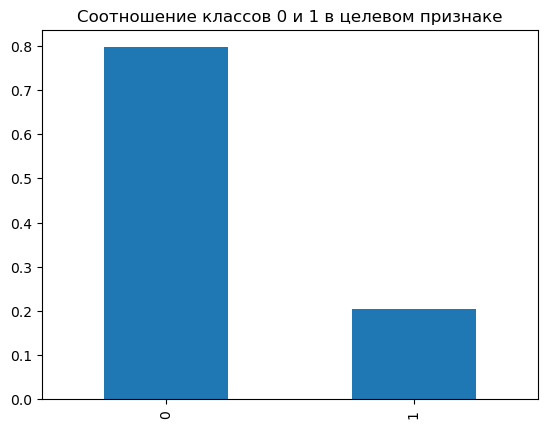

In [17]:
class_frequency = df['Exited'].value_counts(normalize=True)
print('Соотношение классов 0 и 1 в долях:')
print(class_frequency)

class_frequency.plot(kind='bar', title='Соотношение классов 0 и 1 в целевом признаке')
plt.show()

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

Разбила датасет на выборки: обучающую, валидационную и тестовую в соотношении 60:20:20.    
Разбивала с учетом ***параметра стратификации***, чтобы соотношение классов в целевом признаке сохранялось во всех выборках на одном уровне.      
После этого просмотрела количество объектов в выборках, соотношение классов и убедилась, что соотношение сохраняется

<div>

In [18]:
target = df['Exited']
features = df.drop('Exited', axis=1)


In [19]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, \
                                                                              random_state=0, stratify=target)

In [20]:
features_train, features_valid, target_train, target_valid = \
train_test_split(features_train, target_train, test_size=0.25, random_state=0, stratify=target_train)

In [21]:
print('Количество объектов в тренировочной выборке:', target_train.shape)
print('Доля класса 1 в тренировочной выборке:')
target_train.mean()

Количество объектов в тренировочной выборке: (6000,)
Доля класса 1 в тренировочной выборке:


0.20383333333333334

In [22]:
print('Количество объектов в валидационной выборке:', target_valid.shape)
print('Доля класса 1 в валидационной выборке:')
target_valid.mean()

Количество объектов в валидационной выборке: (2000,)
Доля класса 1 в валидационной выборке:


0.2035

In [23]:
print('Количество объектов в тестовой выборке:', target_test.shape)
print('Доля класса 1 в тестовой выборке:')
target_test.mean()

Количество объектов в тестовой выборке: (2000,)
Доля класса 1 в тестовой выборке:


0.2035

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

Сделала масштабирование признаков, имеющих разный масштаб значений: ***кредитный рейтинг, возраст, баланс, предполагаемая зарплата.***     
Для этого обучила алгоритм на тренировочной выборке, а затем применила его для масштабирования данных в тренировочной, валидационной и тестовой выборках.     
<div>

In [24]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [25]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [26]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_men,Germany,Spain
3020,-0.829645,-0.091220,6.0,0.486841,2,0,0,-1.061838,0,0,0
5052,0.110355,-0.091220,0.0,0.455998,1,0,1,1.371174,1,0,0
755,1.566839,-0.758803,9.0,1.287913,2,1,0,0.705662,1,0,0
4697,-1.180854,0.862469,4.0,0.882202,1,1,0,1.140490,1,1,0
9512,0.120685,0.576362,5.0,0.101785,1,1,1,-0.893976,1,0,0


<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

Далее использовала получившиеся выборки.
В целях проведения исследования применяла алгоритмы классификации Логистической регрессии и Случайного леса.        
Обучила эти два алгоритма (подобрав оптимальные гиперпараметры) без использования способов учета дисбаланса классов, затем применила их к валидационной выборке, получила результаты валидации.                   
    
Параллельно сделала заготовку для таблицы, чтобы отслеживать различные метрики моделей с учетом применяемых методов (df_result)

<div>

In [27]:
df_result = pd.DataFrame(columns=['model', 'tp', 'tn', 'fp', 'fn', 'correct', 'incorrect',
                                  'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [28]:
def metric(target_valid, predicted_valid, features_valid, model_name):
    tn, fp, fn, tp = confusion_matrix(target_valid, predicted_valid).ravel()
    accuracy = accuracy_score(target_valid, predicted_valid)
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
    row = {'model': model_name,
           'tp': tp,
           'tn': tn,
           'fp': fp,
           'fn': fn,
           'correct': tp+tn,
           'incorrect': fp+fn,
           'accuracy': round(accuracy,3),
           'precision': round(precision,3),
           'recall': round(recall,3),
           'f1': round(f1,3),
           'roc_auc': round(roc_auc,3)
           }
    return row

In [29]:
model = LogisticRegression(random_state=0, solver='liblinear', C=1, max_iter=10)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

row = metric(target_valid, predicted_valid, features_valid, 'Logistic Regression')

df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.3169398907103825


/tmp/ipykernel_27326/1570618425.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,87,1538,55,320,1625,375,0.812,0.613,0.214,0.317,0.763


ROC_AUC: 0.7626362880600169


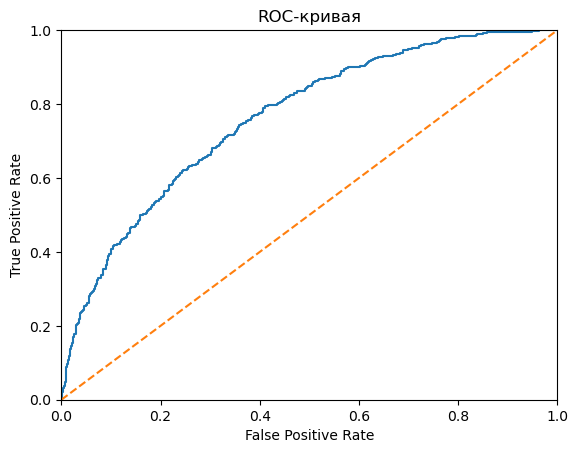

In [30]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC_AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [31]:
%%time
model = None
best_est = 0
best_depth = 0
best_leaf = 0
best_result = 0
for est in range(50, 101, 5):
    for depth in range(10, 15):
        for leaf in range(2, 5):
            model = RandomForestClassifier(random_state=0, n_estimators=est, max_depth=depth, min_samples_leaf=leaf)
            model.fit(features_train, target_train)
            predicted_valid = model.predict(features_valid)
            result = f1_score(target_valid, predicted_valid)
            if result > best_result:
                best_result = result
                best_model = model
                best_est = est
                best_depth = depth
                best_leaf = leaf
print('F1:', best_result, 'best_est:', best_est, 'best_depth:', best_depth, 'best_leaf:', best_leaf)

F1: 0.56 best_est: 90 best_depth: 12 best_leaf: 3
CPU times: user 1min 31s, sys: 61.2 ms, total: 1min 32s
Wall time: 1min 32s


In [32]:
model = RandomForestClassifier(n_estimators=90, max_depth=12, min_samples_leaf=3, random_state=0)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

row = metric(target_valid, predicted_valid, features_valid,  'Random Forest')

df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.56


/tmp/ipykernel_27326/3471058819.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,87,1538,55,320,1625,375,0.812,0.613,0.214,0.317,0.763
1,Random Forest,175,1550,43,232,1725,275,0.862,0.803,0.430,0.560,0.845


ROC_AUC: 0.8452196418298112


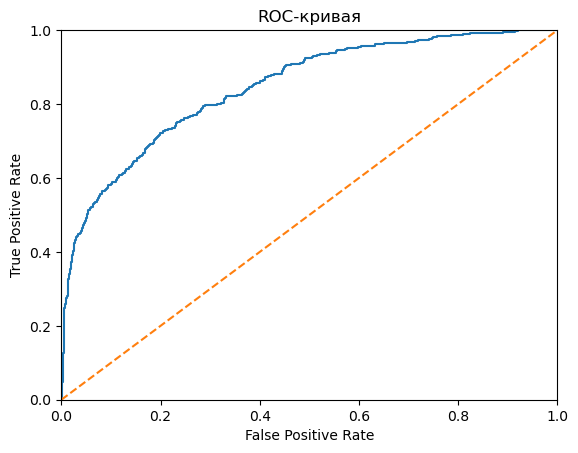

In [33]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC_AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Вывод о моделях, не учитывающих дисбаланс классов (уточнено):

***Получились следующие значения F1:***          
*Логистическая регрессия:  0.32*      
*Случайный лес:  0.56*            
    
Исходя из получившихся метрик можно сделать следующие выводы:
- модель случайного леса показала значительно лучший результат 
- у логистической регрессии все метрики показали результаты хуже, чем у случайного леса      
    

Далее посмотрим результаты моделей при различных способах работы с несбалансированностью классов 
    
<div>

## Борьба с дисбалансом

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

Для работы с дисбалансом есть разные способы. Попробую некоторые из них.  

Для сравнения моделей и способов борьбы с дисбалансом классов решила кроме показателя F1 использовать дополнительные метрики, сделав для них таблицу (df_result), которая будет заполняться по мере проведения исследования (показатели полноты, точности, количество правильных, неправильных ответов каждого класса и другие).
    
Дополнительные метрики позволяют всесторонне оценить модель и иные используемые параметры и сделать выбор модели более обоснованным.
    
Например, при формировании прогноза, уйдет ли клиент из банка показатель полноты имеет более важное значение, чем показатель точности, т.к. уход клиента влечет потери доходов банка.    

<div>

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
**Первый способ** работы с дисбалансом классов, который я рассмотрела - использование гиперпараметра class_weight со значением 'balanced'.        
Результат F1 у линейной регрессии улучшился значительно: с 0.32 до 0.48.      
Результат F1 у случайного леса также улучшился: с 0.56 до 0.599.

<div>

In [34]:
model = LogisticRegression(random_state=0, solver='liblinear', C=1, max_iter=10, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
row = metric(target_valid, predicted_valid, features_valid, 'Logistic Regression balanced')
df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.4831970935513169


/tmp/ipykernel_27326/241662493.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,87,1538,55,320,1625,375,0.812,0.613,0.214,0.317,0.763
1,Random Forest,175,1550,43,232,1725,275,0.862,0.803,0.430,0.560,0.845
2,Logistic Regression balanced,266,1165,428,141,1431,569,0.716,0.383,0.654,0.483,0.765


In [35]:
model = RandomForestClassifier(n_estimators=90, max_depth=12, min_samples_leaf=3, \
                               random_state=0, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) 
 
print("F1:", f1_score(target_valid, predicted_valid))

row = metric(target_valid, predicted_valid, features_valid, 'Random Forest balanced')
df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.5992217898832685


/tmp/ipykernel_27326/1363388060.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,87,1538,55,320,1625,375,0.812,0.613,0.214,0.317,0.763
1,Random Forest,175,1550,43,232,1725,275,0.862,0.803,0.430,0.560,0.845
2,Logistic Regression balanced,266,1165,428,141,1431,569,0.716,0.383,0.654,0.483,0.765
3,Random Forest balanced,231,1460,133,176,1691,309,0.846,0.635,0.568,0.599,0.849


<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

**Второй способ** работы с дисбалансом классов - увеличение выборки.        
Для этого использовала написанную функцию upsample.                         
Количество повторений объектов класса 1 выбрала 3 учитывая, что соотношение классов в целевом признаке в выборках примерно 1:4 и чтобы класс 0 с учетом корректировки остался преобладающим.        
Результат F1 у линейной регрессии получился 0.47      
Результат F1 у случайного леса - 0.59               

<div>

In [36]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=0)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

In [37]:
target_upsampled.value_counts()

0    4777
1    3669
Name: Exited, dtype: int64

In [38]:
model = LogisticRegression(random_state=0, solver='liblinear', C=1, max_iter=10)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))


row = metric(target_valid, predicted_valid, features_valid,  'Logistic Regression upsampled')
df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.4707112970711297


/tmp/ipykernel_27326/1278781057.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,87,1538,55,320,1625,375,0.812,0.613,0.214,0.317,0.763
1,Random Forest,175,1550,43,232,1725,275,0.862,0.803,0.430,0.560,0.845
2,Logistic Regression balanced,266,1165,428,141,1431,569,0.716,0.383,0.654,0.483,0.765
3,Random Forest balanced,231,1460,133,176,1691,309,0.846,0.635,0.568,0.599,0.849
4,Logistic Regression upsampled,225,1269,324,182,1494,506,0.747,0.410,0.553,0.471,0.764


In [39]:
model = RandomForestClassifier(n_estimators=90, max_depth=12, min_samples_leaf=3, random_state=0)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid) 
print("F1:", f1_score(target_valid, predicted_valid))

row = metric(target_valid, predicted_valid, features_valid, 'Random Forest upsampled')
df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.5913705583756345


/tmp/ipykernel_27326/1809657166.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,87,1538,55,320,1625,375,0.812,0.613,0.214,0.317,0.763
1,Random Forest,175,1550,43,232,1725,275,0.862,0.803,0.430,0.560,0.845
2,Logistic Regression balanced,266,1165,428,141,1431,569,0.716,0.383,0.654,0.483,0.765
3,Random Forest balanced,231,1460,133,176,1691,309,0.846,0.635,0.568,0.599,0.849
4,Logistic Regression upsampled,225,1269,324,182,1494,506,0.747,0.410,0.553,0.471,0.764
5,Random Forest upsampled,233,1445,148,174,1678,322,0.839,0.612,0.572,0.591,0.846


<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

**Третий способ** работы с дисбалансом классов - уменьшение выборки.        
Для этого использовала написанную функцию downsample.         
Соотношение для уменьшения объектов класса 0 выбрала 0.33 учитывая ту же логику, что и в предыдущем варианте, только в обратную сторону (1/3 ~ 0.33).    
Результат F1 у линейной регрессии - 0.46      
Результат F1 у случайного - 0.599

<div>

In [40]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.33)

In [41]:
target_downsampled.value_counts()

0    1576
1    1223
Name: Exited, dtype: int64

In [42]:
lr_downsampled = LogisticRegression(random_state=0, solver='liblinear', C=1, max_iter=10)
lr_downsampled.fit(features_downsampled, target_downsampled)
predicted_valid = lr_downsampled.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

row = metric(target_valid, predicted_valid, features_valid, 'Logistic Regression downsampled')
df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.4639498432601881


/tmp/ipykernel_27326/3041646326.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,87,1538,55,320,1625,375,0.812,0.613,0.214,0.317,0.763
1,Random Forest,175,1550,43,232,1725,275,0.862,0.803,0.430,0.560,0.845
2,Logistic Regression balanced,266,1165,428,141,1431,569,0.716,0.383,0.654,0.483,0.765
3,Random Forest balanced,231,1460,133,176,1691,309,0.846,0.635,0.568,0.599,0.849
4,Logistic Regression upsampled,225,1269,324,182,1494,506,0.747,0.410,0.553,0.471,0.764
5,Random Forest upsampled,233,1445,148,174,1678,322,0.839,0.612,0.572,0.591,0.846
6,Logistic Regression downsampled,222,1265,328,185,1487,513,0.744,0.404,0.545,0.464,0.846


In [43]:
clf_downsampled = RandomForestClassifier(n_estimators=90, max_depth=12, min_samples_leaf=3, random_state=0)
clf_downsampled.fit(features_downsampled, target_downsampled)
predicted_valid = clf_downsampled.predict(features_valid) 

print("F1:", f1_score(target_valid, predicted_valid))

row = metric(target_valid, predicted_valid, features_valid, 'Random Forest downsampled')
df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.5988439306358381


/tmp/ipykernel_27326/1280083772.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,87,1538,55,320,1625,375,0.812,0.613,0.214,0.317,0.763
1,Random Forest,175,1550,43,232,1725,275,0.862,0.803,0.430,0.560,0.845
2,Logistic Regression balanced,266,1165,428,141,1431,569,0.716,0.383,0.654,0.483,0.765
3,Random Forest balanced,231,1460,133,176,1691,309,0.846,0.635,0.568,0.599,0.849
4,Logistic Regression upsampled,225,1269,324,182,1494,506,0.747,0.410,0.553,0.471,0.764
5,Random Forest upsampled,233,1445,148,174,1678,322,0.839,0.612,0.572,0.591,0.846
6,Logistic Regression downsampled,222,1265,328,185,1487,513,0.744,0.404,0.545,0.464,0.846
7,Random Forest downsampled,259,1394,199,148,1653,347,0.826,0.566,0.636,0.599,0.846


<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

**Четвертый способ** работы с дисбалансом классов - изучить порог, определяющий границу классов и его влияние на метрики модели.   
    
Изучила влияние порога также на моделях линейной регрессии и случайного леса.          
    
В модели ***логистической регрессии:***         
    - при применении порога 0.22:              
    - максимальное значение F1 - 0.48,               
    - полнота - 0.62,             
    - точность - 0.39               
    
В модели ***случайного леса:***                  
    - при применении порога 0.34:               
    - максимальное значение F1 - 0.60,                
    - полнота - 0.56,              
    - точность - 0.64           
      
<div>

Порог = 0.00 | Точность = 0.203, Полнота = 1.000 | F1 = 0.338
Порог = 0.02 | Точность = 0.204, Полнота = 1.000 | F1 = 0.339
Порог = 0.04 | Точность = 0.216, Полнота = 0.995 | F1 = 0.354
Порог = 0.06 | Точность = 0.237, Полнота = 0.983 | F1 = 0.381
Порог = 0.08 | Точность = 0.254, Полнота = 0.951 | F1 = 0.401
Порог = 0.10 | Точность = 0.273, Полнота = 0.916 | F1 = 0.421
Порог = 0.12 | Точность = 0.292, Полнота = 0.870 | F1 = 0.437
Порог = 0.14 | Точность = 0.311, Полнота = 0.826 | F1 = 0.452
Порог = 0.16 | Точность = 0.330, Полнота = 0.776 | F1 = 0.463
Порог = 0.18 | Точность = 0.352, Полнота = 0.713 | F1 = 0.471
Порог = 0.20 | Точность = 0.368, Полнота = 0.651 | F1 = 0.470
Порог = 0.22 | Точность = 0.386, Полнота = 0.622 | F1 = 0.476
Порог = 0.24 | Точность = 0.400, Полнота = 0.582 | F1 = 0.474
Порог = 0.26 | Точность = 0.416, Полнота = 0.538 | F1 = 0.469
Порог = 0.28 | Точность = 0.435, Полнота = 0.501 | F1 = 0.466
Порог = 0.30 | Точность = 0.453, Полнота = 0.467 | F1 = 0.460
Порог = 

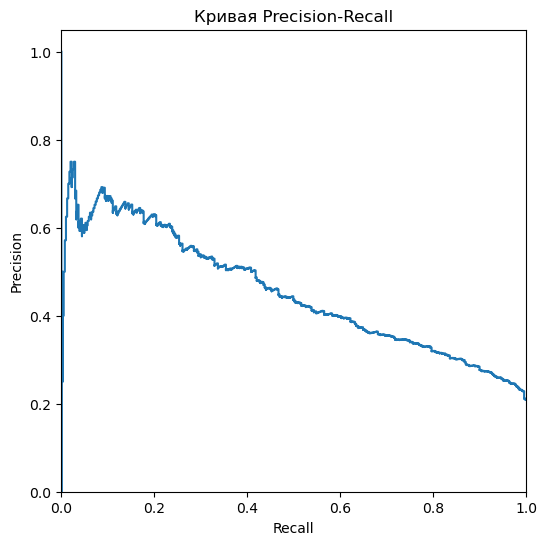

In [44]:
model = LogisticRegression(random_state=0, solver='liblinear', C=1, max_iter=10)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.4, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))


probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Порог = 0.00 | Точность = 0.203, Полнота = 1.000 | F1 = 0.3382
Порог = 0.02 | Точность = 0.219, Полнота = 0.995 | F1 = 0.3590
Порог = 0.04 | Точность = 0.250, Полнота = 0.980 | F1 = 0.3986
Порог = 0.06 | Точность = 0.280, Полнота = 0.958 | F1 = 0.4333
Порог = 0.08 | Точность = 0.314, Полнота = 0.934 | F1 = 0.4700
Порог = 0.10 | Точность = 0.340, Полнота = 0.882 | F1 = 0.4908
Порог = 0.12 | Точность = 0.364, Полнота = 0.840 | F1 = 0.5082
Порог = 0.14 | Точность = 0.390, Полнота = 0.801 | F1 = 0.5245
Порог = 0.16 | Точность = 0.417, Полнота = 0.779 | F1 = 0.5433
Порог = 0.18 | Точность = 0.446, Полнота = 0.754 | F1 = 0.5607
Порог = 0.20 | Точность = 0.469, Полнота = 0.730 | F1 = 0.5712
Порог = 0.22 | Точность = 0.489, Полнота = 0.693 | F1 = 0.5732
Порог = 0.24 | Точность = 0.508, Полнота = 0.666 | F1 = 0.5766
Порог = 0.26 | Точность = 0.532, Полнота = 0.639 | F1 = 0.5804
Порог = 0.28 | Точность = 0.554, Полнота = 0.614 | F1 = 0.5828
Порог = 0.30 | Точность = 0.579, Полнота = 0.592 | F1 =

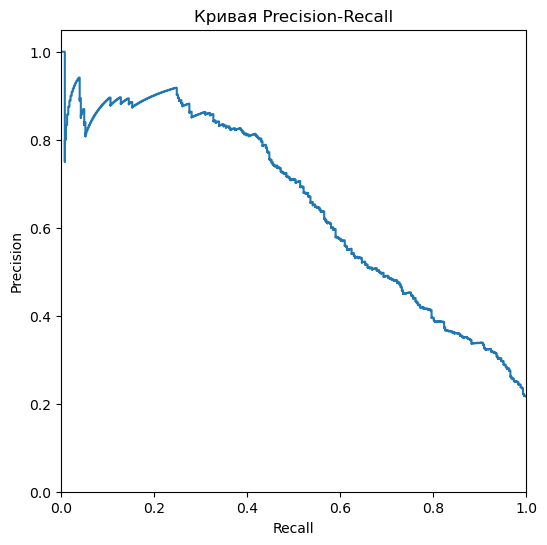

In [45]:
model = RandomForestClassifier(n_estimators=90, max_depth=12, min_samples_leaf=3, random_state=0)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.5, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f} | F1 = {:.4f}".format(
        threshold, precision, recall, f1))

probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show()

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

**Пятый способ** работы с дисбалансом классов - использование техники SMOTE библиотеки imblearn.

SMOTE отличается от upsampling тем, что не просто умножает объекты с миноритарным классом, а  создает новые "искусственные" объекты, близкие по значению к объектам класса меньшинства, которые  используются для увеличения объектов признака, который "в меньшинстве".    
      
<div>

In [46]:
oversampled = SMOTE(random_state=0)
features_train_smote, target_train_smote = oversampled.fit_resample(features_train, target_train)
target_train_smote.value_counts()

0    4777
1    4777
Name: Exited, dtype: int64

In [47]:
classifier = LogisticRegression(random_state=0, solver='liblinear', C=1, max_iter=10)
model = classifier.fit(features_train_smote, target_train_smote)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

row = metric(target_valid, predicted_valid, features_valid, 'Logistic Regression SMOTE')
df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.46520495710200194


/tmp/ipykernel_27326/2111220893.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,87,1538,55,320,1625,375,0.812,0.613,0.214,0.317,0.763
1,Random Forest,175,1550,43,232,1725,275,0.862,0.803,0.430,0.560,0.845
2,Logistic Regression balanced,266,1165,428,141,1431,569,0.716,0.383,0.654,0.483,0.765
3,Random Forest balanced,231,1460,133,176,1691,309,0.846,0.635,0.568,0.599,0.849
4,Logistic Regression upsampled,225,1269,324,182,1494,506,0.747,0.410,0.553,0.471,0.764
5,Random Forest upsampled,233,1445,148,174,1678,322,0.839,0.612,0.572,0.591,0.846
6,Logistic Regression downsampled,222,1265,328,185,1487,513,0.744,0.404,0.545,0.464,0.846
7,Random Forest downsampled,259,1394,199,148,1653,347,0.826,0.566,0.636,0.599,0.846
8,Logistic Regression SMOTE,244,1195,398,163,1439,561,0.720,0.380,0.600,0.465,0.744


In [48]:
classifier = RandomForestClassifier(n_estimators=90, max_depth=12, min_samples_leaf=3, random_state=0)
model = classifier.fit(features_train_smote, target_train_smote)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

row = metric(target_valid, predicted_valid, features_valid, 'Random Forest SMOTE')
df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.5774647887323944


/tmp/ipykernel_27326/701084860.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,87,1538,55,320,1625,375,0.812,0.613,0.214,0.317,0.763
1,Random Forest,175,1550,43,232,1725,275,0.862,0.803,0.430,0.560,0.845
2,Logistic Regression balanced,266,1165,428,141,1431,569,0.716,0.383,0.654,0.483,0.765
3,Random Forest balanced,231,1460,133,176,1691,309,0.846,0.635,0.568,0.599,0.849
4,Logistic Regression upsampled,225,1269,324,182,1494,506,0.747,0.410,0.553,0.471,0.764
5,Random Forest upsampled,233,1445,148,174,1678,322,0.839,0.612,0.572,0.591,0.846
6,Logistic Regression downsampled,222,1265,328,185,1487,513,0.744,0.404,0.545,0.464,0.846
7,Random Forest downsampled,259,1394,199,148,1653,347,0.826,0.566,0.636,0.599,0.846
8,Logistic Regression SMOTE,244,1195,398,163,1439,561,0.720,0.380,0.600,0.465,0.744
9,Random Forest SMOTE,246,1394,199,161,1640,360,0.820,0.553,0.604,0.577,0.839


In [49]:
# Итоговая модель Случайный лес
model = RandomForestClassifier(n_estimators=90, max_depth=12, min_samples_leaf=3, random_state=0)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
predicted_valid = probabilities_one_valid > 0.34

print("F1:", f1_score(target_valid, predicted_valid))
    

F1: 0.5979112271540471


In [50]:
row = metric(target_valid, predicted_valid, features_valid, 'Random Forest threshold 0.34 VALID')
df_result = df_result.append(row, ignore_index=True)
df_result

/tmp/ipykernel_27326/2502419394.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,87,1538,55,320,1625,375,0.812,0.613,0.214,0.317,0.763
1,Random Forest,175,1550,43,232,1725,275,0.862,0.803,0.430,0.560,0.845
2,Logistic Regression balanced,266,1165,428,141,1431,569,0.716,0.383,0.654,0.483,0.765
3,Random Forest balanced,231,1460,133,176,1691,309,0.846,0.635,0.568,0.599,0.849
4,Logistic Regression upsampled,225,1269,324,182,1494,506,0.747,0.410,0.553,0.471,0.764
5,Random Forest upsampled,233,1445,148,174,1678,322,0.839,0.612,0.572,0.591,0.846
6,Logistic Regression downsampled,222,1265,328,185,1487,513,0.744,0.404,0.545,0.464,0.846
7,Random Forest downsampled,259,1394,199,148,1653,347,0.826,0.566,0.636,0.599,0.846
8,Logistic Regression SMOTE,244,1195,398,163,1439,561,0.720,0.380,0.600,0.465,0.744
9,Random Forest SMOTE,246,1394,199,161,1640,360,0.820,0.553,0.604,0.577,0.839


<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Выводы о способах работы с дисбалансом классов

Таким образом, я использовала **5 способов** работы с дисбалансом классов:                         
    - *применение гиперпараметра class_weight=balanced,*         
    - *увеличение выборки в целях увеличение объектов миноритарного класса,*                  
    - *уменьшение выборки путем уменьшения объектов мажоритарного класса,*                   
    - *изучение и применение порога вероятности для отнесения к классам,*                   
    - *использование механизма SMOTE из библиотеки imblearn*                   

Получившиеся метрики при проверке моделей на валидационной выборке можно увидеть в таблице. 
    
Исходя из критерия максимизации показателя F1 я выбрала модель Случайного леса с установленным порогом отнесения к классам - 0.34. При использовании этой модели показатель F1 получился равным 0.6, полнота получилась 0.56.          
Также можно рассмотреть варианты порога чуть больше или чуть меньше, которые покажут лучше результат полноты, если будет стоять такая задача.    
      
<div>

## Тестирование модели

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

Для выбранной модели провела итоговую проверку на тестовой выборке, определила показатель ROC_AUC, построила график ROC-кривой.    
      
<div>

In [51]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > 0.34

print("F1:", f1_score(target_test, predicted_test))
    

F1: 0.6169405815423514


In [52]:
row = metric(target_test, predicted_test, features_test, 'Random Forest final TEST')
df_result = df_result.append(row, ignore_index=True)
df_result

/tmp/ipykernel_27326/884958933.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,87,1538,55,320,1625,375,0.812,0.613,0.214,0.317,0.763
1,Random Forest,175,1550,43,232,1725,275,0.862,0.803,0.430,0.560,0.845
2,Logistic Regression balanced,266,1165,428,141,1431,569,0.716,0.383,0.654,0.483,0.765
3,Random Forest balanced,231,1460,133,176,1691,309,0.846,0.635,0.568,0.599,0.849
4,Logistic Regression upsampled,225,1269,324,182,1494,506,0.747,0.410,0.553,0.471,0.764
5,Random Forest upsampled,233,1445,148,174,1678,322,0.839,0.612,0.572,0.591,0.846
6,Logistic Regression downsampled,222,1265,328,185,1487,513,0.744,0.404,0.545,0.464,0.846
7,Random Forest downsampled,259,1394,199,148,1653,347,0.826,0.566,0.636,0.599,0.846
8,Logistic Regression SMOTE,244,1195,398,163,1439,561,0.720,0.380,0.600,0.465,0.744
9,Random Forest SMOTE,246,1394,199,161,1640,360,0.820,0.553,0.604,0.577,0.839


ROC_AUC: 0.8510652408957494


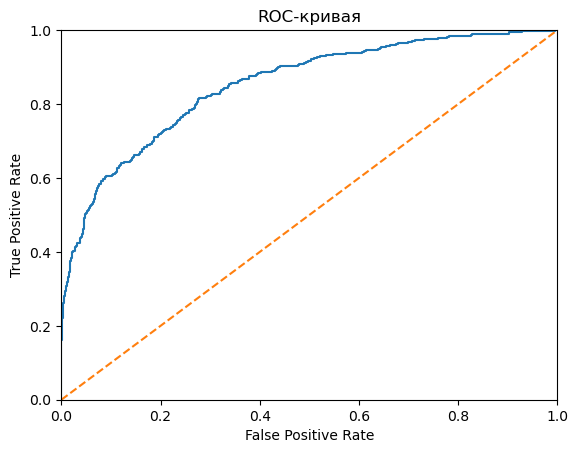

In [53]:
roc_auc = roc_auc_score(target_test, probabilities_one_test)

print("ROC_AUC:", roc_auc)
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [54]:
# Определение важности признаков

features_importance = pd.DataFrame({'name':features_test.columns,'features_importance':model.feature_importances_})
features_importance.sort_values('features_importance',ascending=False).reset_index(drop=True)


,name,features_importance
0,Age,0.308789
1,NumOfProducts,0.196482
2,Balance,0.115829
3,EstimatedSalary,0.096561
4,CreditScore,0.090740
5,Tenure,0.054248
6,IsActiveMember,0.053865
7,Germany,0.040713
8,Gender_men,0.020674
9,HasCrCard,0.011647


<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Общий вывод по проекту     

**Целью проекта** было построить систему, способную спрогнозировать, уйдет ли клиент из банка в ближайшее время для того, чтобы можно было их каким-то образом попробовать удержать. При этом нужно было построить модель с максимально большим показателем F-меры, но не меньше 0.59.   

Имелся некоторый датасет с данными в целом о клиентах, в том числе о тех, которые ушли.

Для достижения поставленной цели мной было сделано следующее:

1. Просмотрен имеющийся датасет, произведены его преобразования:
    - использован заполнитель "-1" к отсутствующим данным признака *сколько лет человек является клиентом банка*,
    - исключила нерелевантные признаки(RowNumber, CustomerId, Surname),
    - применила технику прямого кодирования для того, чтобы преобразовать категориальные признаки *пол* и *страна* 
    - также на этом этапе изучила взаимозависимость признаков с целевым признаком, обнаружила наличие некоторой взаимосвязи количества продуктов и возраста с вероятностью ухода клиента. Впоследствии при определении важности признаков в итоговой модели критерий возраста также нашел свое подтверждение,
    - изучила соотношение классов в целях обнаружения из несбалансированности, получилось соотношение примерно 1:4,
    - разбила датасет на тренировочную, валидационную и тестовую выборки
    - применила масштабирование для признаков, имеющих разный масштаб (кредитный рейтинг, возраст, баланс, предполагаемая зарплата).        

2. Использовала получившиеся выборки для обучения моделей классификации Логистической регрессии и Случайного леса без учета дисбаланса классов, зафиксировала получившиеся результаты: метрика F-мера логистической регрессии получилась - 0.32, у Случайного леса - 0.56.

3. Применила **5 вариантов** устранения проблемы дисбаланса классов, изучила полученные результаты на валидационной выборке, составила таблицу - сравнение некоторых метрик получившихся моделей, при этом:     
    - наилучший результат F-меры получился у модели Случайного леса с установлением порога отнесения к признакам 0.38,
    - если задачей исследования является выявление бОльшего количества потенциальных клиентов банка, которые могут уйти, важным показателем является метрика "полнота". Другие метрики также дополняют картину для проведения анализа.
    
4. Выбраная модель показала на тестовой выборке следующие результаты:
    - F-мера - 0.62,
    - полнота - 0.60,
    - ROC_AUC - 0.85,
    - анализ значимости признаков показал наибольшую важность признака возраст.
    
    
    
      
      
<div>